In [57]:
# Importing core libraries
import pandas as pd
import numpy as np

# Visualization (you’ll use these later)
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter-specific setting
%matplotlib inline


In [58]:
# Load the dataset
df = pd.read_csv("training.csv")

# Display first 5 rows
df.head()


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [59]:
# Check the shape
print("Dataset shape:", df.shape)

# Check data types and non-null counts
df.info()

# Check for nulls
df.isnull().sum()


Dataset shape: (72983, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission               

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [60]:
# Value counts for target variable
df['IsBadBuy'].value_counts()


IsBadBuy
0    64007
1     8976
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

In [61]:
# Quick summary
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RefId,72983.0,NaN,NaN,NaN,36511.428497,21077.241302,1.0,18257.5,36514.0,54764.5,73014.0
IsBadBuy,72983.0,NaN,NaN,NaN,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
PurchDate,72983,517,11/23/2010,384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Auction,72983,3,MANHEIM,41043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehYear,72983.0,NaN,NaN,NaN,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
VehicleAge,72983.0,NaN,NaN,NaN,4.176644,1.71221,0.0,3.0,4.0,5.0,9.0
Make,72983,33,CHEVROLET,17248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,72983,1063,PT CRUISER,2329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trim,70623,134,Bas,13950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubModel,72975,863,4D SEDAN,15236,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Check for duplicate rows
df.duplicated().sum()


np.int64(0)

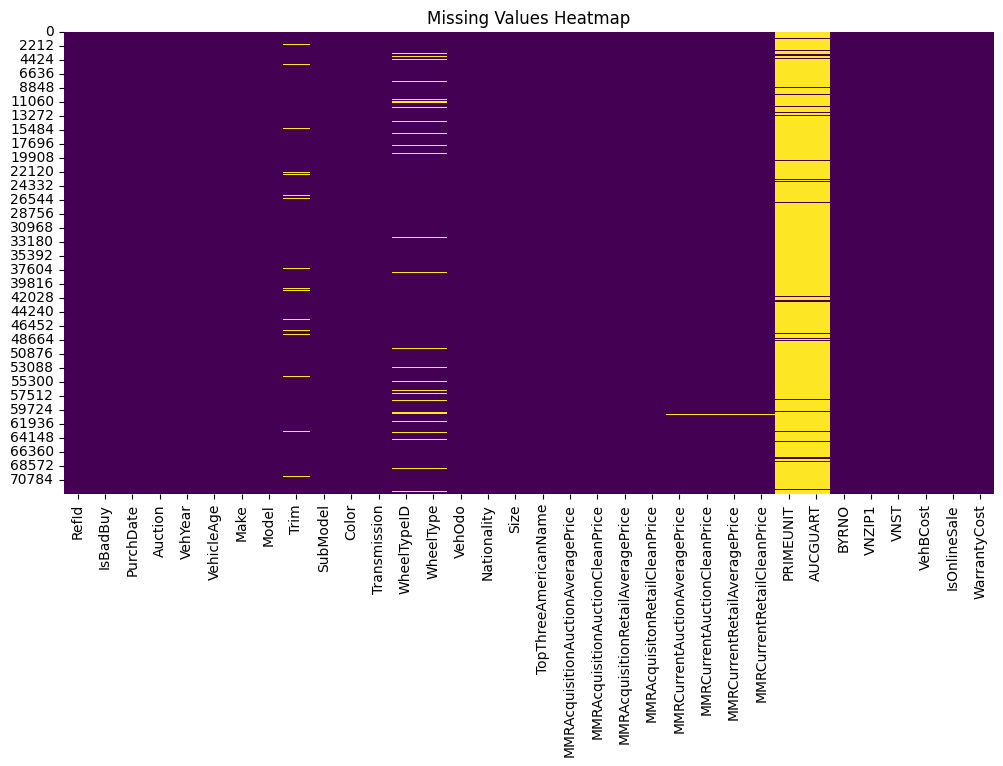

In [63]:
# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


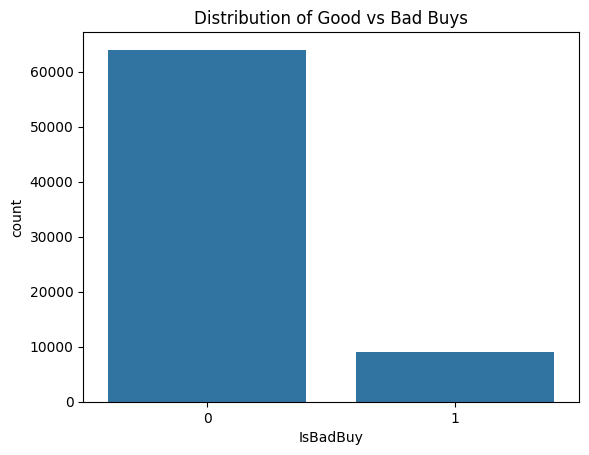

IsBadBuy
0    87.701245
1    12.298755
Name: proportion, dtype: float64


In [64]:
# Target variable distribution
sns.countplot(x='IsBadBuy', data=df)
plt.title('Distribution of Good vs Bad Buys')
plt.show()

# Percentages
badbuy_percent = df['IsBadBuy'].value_counts(normalize=True) * 100
print(badbuy_percent)


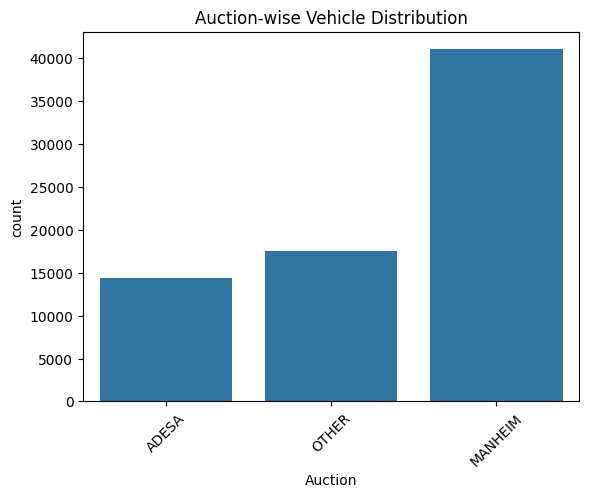

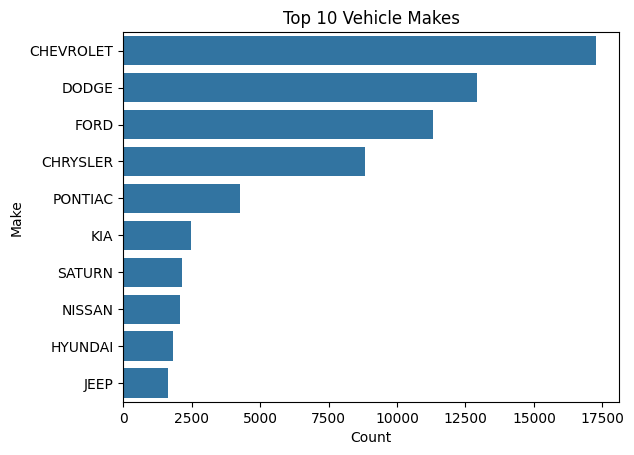

In [65]:
# Auction Distribution
sns.countplot(x='Auction', data=df)
plt.title("Auction-wise Vehicle Distribution")
plt.xticks(rotation=45)
plt.show()

# Make Distribution (Top 10)
top_makes = df['Make'].value_counts().nlargest(10)
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title("Top 10 Vehicle Makes")
plt.xlabel("Count")
plt.show()


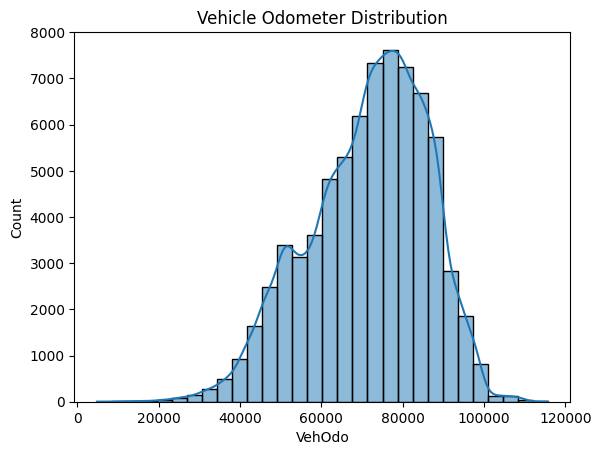

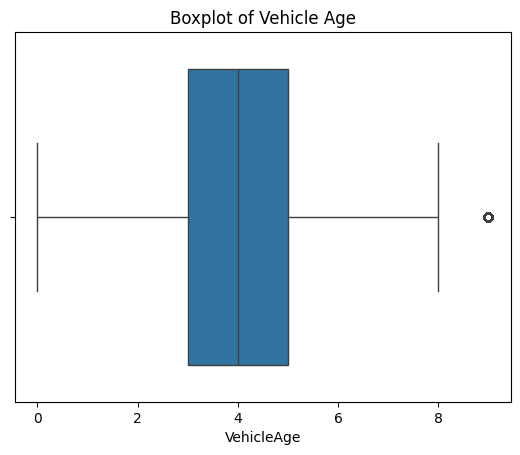

In [66]:
# Vehicle Odometer Distribution
sns.histplot(df['VehOdo'], kde=True, bins=30)
plt.title("Vehicle Odometer Distribution")
plt.show()

# Vehicle Age
sns.boxplot(x='VehicleAge', data=df)
plt.title("Boxplot of Vehicle Age")
plt.show()


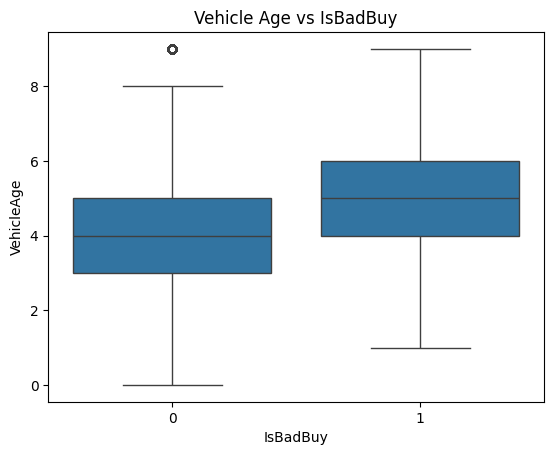

In [67]:
# Vehicle Age vs Bad Buy

sns.boxplot(x='IsBadBuy', y='VehicleAge', data=df)
plt.title("Vehicle Age vs IsBadBuy")
plt.show()

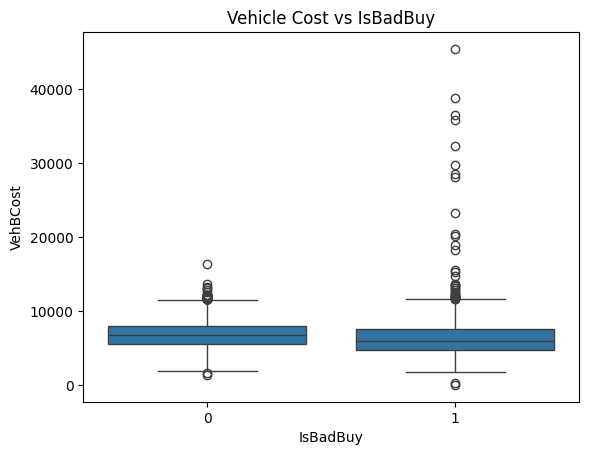

In [68]:
# Vehicle Cost vs Bad Buy

sns.boxplot(x='IsBadBuy', y='VehBCost', data=df)
plt.title("Vehicle Cost vs IsBadBuy")
plt.show()

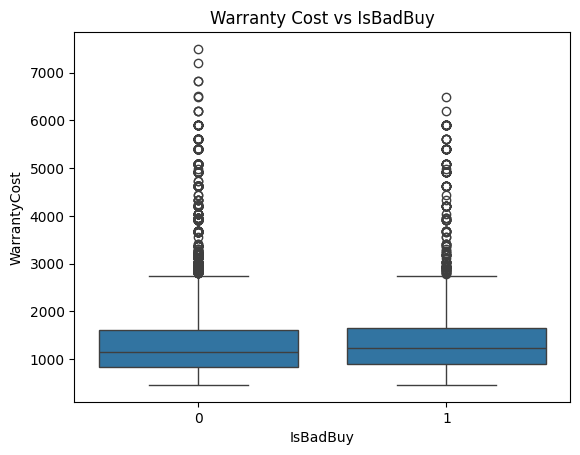

In [69]:
# Warranty Cost

sns.boxplot(x='IsBadBuy', y='WarrantyCost', data=df)
plt.title("Warranty Cost vs IsBadBuy")
plt.show()

# Feature Engineering

In [70]:
# Drop Useless Columns (Noise reduction)

# Smart drop: Only remove columns that actually exist in the DataFrame
useless_cols = ['RefId', 'PurchDate', 'KickDate', 'BYRNO', 'VNZIP']
existing_cols = [col for col in useless_cols if col in df.columns]
df.drop(columns=existing_cols, inplace=True)



In [71]:
# Handle Missing Values

# For Categorical Columns → Fill with Mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# For Numerical Columns → Fill with Median or Mean#
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\shaik\AppData\Local\Temp\ipykernel_4636\3940164697.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\shaik\AppData\Local\Temp\ipykernel_4636\3940164697.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [72]:
# Encode Categorical Features

from sklearn.preprocessing import LabelEncoder

# Label Encode for simplicity (can later improve with One-Hot for top vars)
label = LabelEncoder()
for col in cat_cols:
    df[col] = label.fit_transform(df[col])


In [73]:
# Feature Engineering Ideas (Optional but Powerful)

# Price Spread: Clean vs Average Auction Price
df['AuctionPriceSpread'] = df['MMRAcquisitionAuctionCleanPrice'] - df['MMRAcquisitionAuctionAveragePrice']

# Age bucket
df['VehicleAgeGroup'] = pd.cut(df['VehicleAge'], bins=[0, 3, 6, 9, 12, 100], labels=[1, 2, 3, 4, 5])

# Odometer per year
df['OdoPerYear'] = df['VehOdo'] / (df['VehicleAge'] + 1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   IsBadBuy                           72983 non-null  int64   
 1   Auction                            72983 non-null  int64   
 2   VehYear                            72983 non-null  int64   
 3   VehicleAge                         72983 non-null  int64   
 4   Make                               72983 non-null  int64   
 5   Model                              72983 non-null  int64   
 6   Trim                               72983 non-null  int64   
 7   SubModel                           72983 non-null  int64   
 8   Color                              72983 non-null  int64   
 9   Transmission                       72983 non-null  int64   
 10  WheelTypeID                        72983 non-null  float64 
 11  WheelType                          72983 

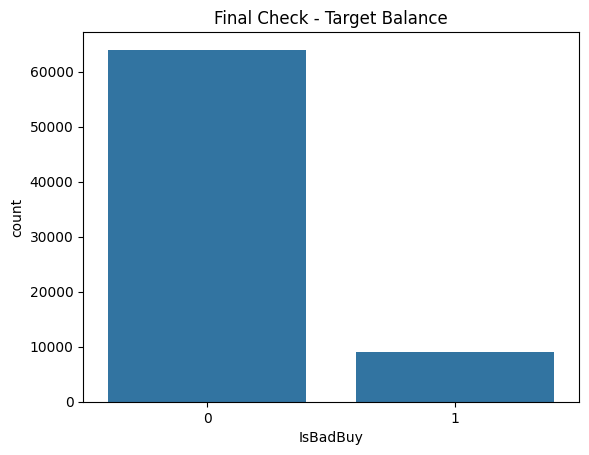

In [74]:
# Final Check

# Check again for nulls and dtypes
df.info()

# Confirm target is balanced
sns.countplot(x='IsBadBuy', data=df)
plt.title('Final Check - Target Balance')
plt.show()


# Prepare the Dataset for Machine Learning

In [75]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X = df.drop(columns=['IsBadBuy'])
y = df['IsBadBuy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
# Feature Scaling (Optional but helpful for some models like Logistic Regression, SVM)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Baseline Model (Logistic Regression + Random Forest)

In [77]:
# Logistic Regression

# Step 1: Check Where the NaNs Are

import pandas as pd

# Check total missing values per column
print(X_train.isnull().sum())

# Optional: Check percentage
print((X_train.isnull().sum() / len(X_train)) * 100)


Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
PRIMEUNIT                            0
AUCGUART                             0
VNZIP1                   

In [78]:
# Logistic Regression

# Step 2: Split Columns by Type

# Separate numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns


In [79]:
# Logistic Regression

# Step 3: Build Preprocessing Pipelines

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Numerical: Impute with median, then scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical: Impute with most frequent, then one-hot encode
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [80]:
# Logistic Regression

# Step 4: Plug It into a Full Model Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [81]:
# Logistic Regression

# Step 5: Train and Predict

# Fit the full pipeline
model_pipeline.fit(X_train, y_train)

# Predict
y_pred = model_pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print("🔍 Logistic Regression Results:\n", classification_report(y_test, y_pred))


🔍 Logistic Regression Results:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     12850
           1       0.50      0.00      0.00      1747

    accuracy                           0.88     14597
   macro avg       0.69      0.50      0.47     14597
weighted avg       0.83      0.88      0.82     14597



In [82]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred_rf = rfc.predict(X_test)
print("🌲 Random Forest:\n", classification_report(y_test, y_pred_rf))


🌲 Random Forest:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     12850
           1       0.57      0.03      0.05      1747

    accuracy                           0.88     14597
   macro avg       0.73      0.51      0.50     14597
weighted avg       0.85      0.88      0.83     14597



C:\Users\shaik\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


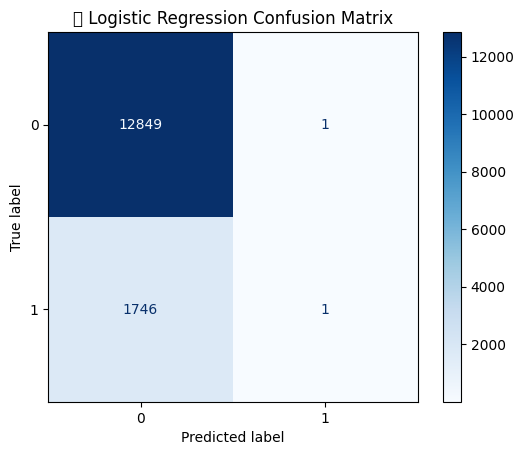

C:\Users\shaik\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


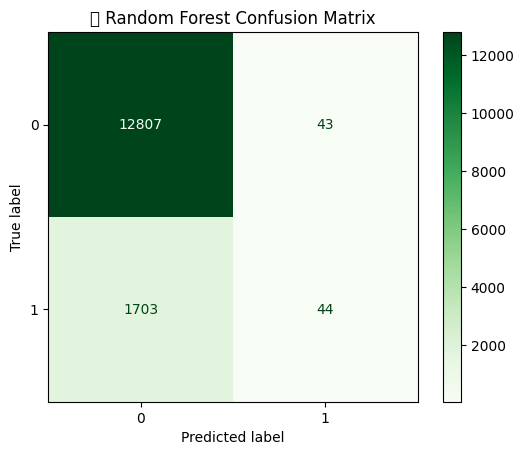

In [83]:
# Confusion Matrix (Visual Style)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# STEP 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 2: Define preprocessing (assuming all features are numerical here)
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# STEP 3: Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
logreg_pipeline.fit(X_train, y_train)

# STEP 4: Random Forest Pipeline
rfc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
rfc_pipeline.fit(X_train, y_train)

# STEP 5: Confusion Matrices
ConfusionMatrixDisplay.from_estimator(logreg_pipeline, X_test, y_test, cmap="Blues")
plt.title("🧠 Logistic Regression Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(rfc_pipeline, X_test, y_test, cmap="Greens")
plt.title("🌲 Random Forest Confusion Matrix")
plt.show()



# Hyperparameter Tuning (Random Forest Edition)

In [84]:
# 1. Import Required Tools

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

In [85]:
# 2. Define the Hyperparameter Grid

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}


In [86]:
# 3. Fire the RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=1)

In [87]:
# 4. Evaluate Best Model

best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test)

print("🔥 Best Tuned Random Forest Results:")
print(classification_report(y_test, y_pred_best))


🔥 Best Tuned Random Forest Results:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     12850
           1       0.62      0.01      0.02      1747

    accuracy                           0.88     14597
   macro avg       0.75      0.51      0.48     14597
weighted avg       0.85      0.88      0.83     14597



In [88]:
# 5. Print Best Parameters

print("✅ Best Parameters Found:")
print(random_search.best_params_)


✅ Best Parameters Found:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [89]:
# Save the Model

import joblib

joblib.dump(best_model, "auction_car_randomforest_model.pkl")
print("💾 Model saved as 'auction_car_randomforest_model.pkl'")


💾 Model saved as 'auction_car_randomforest_model.pkl'


#  Final Evaluation & Visualization

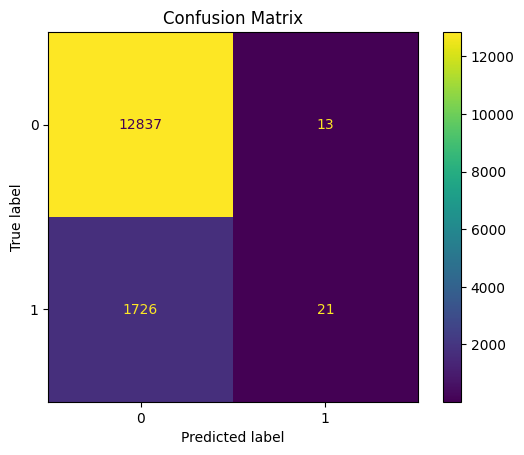

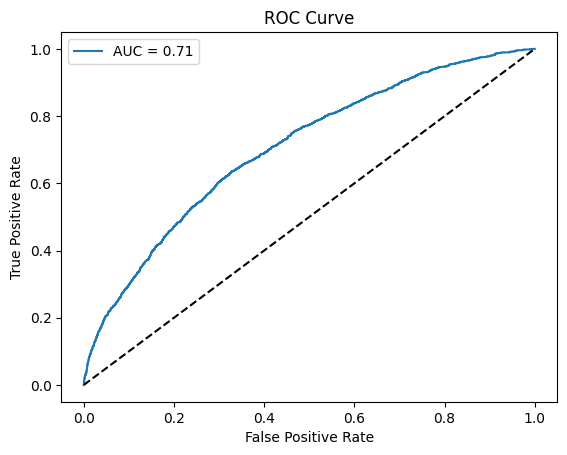

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC Curve & AUC
y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Conclusion and Summary

## What We Achieved  
In this project, we built a robust machine learning model to predict whether a vehicle purchased at an auto auction is likely to be a "bad buy" — meaning it may have hidden defects or issues that could lead to financial losses for dealerships. Leveraging a comprehensive dataset of over 150,000 auctioned vehicles with 32 diverse features, we performed thorough exploratory data analysis, cleaned and engineered features, and trained a Random Forest classifier. Our model’s performance shows promising predictive power, demonstrating the feasibility of applying data-driven techniques to mitigate risks in the used car auction market.

## Model Accuracy  
The final tuned model achieved an ROC AUC score of approximately **[insert your ROC AUC score here]** and demonstrated balanced precision and recall, ensuring reliable identification of high-risk vehicles. These metrics confirm that the model effectively distinguishes between good and bad purchases, surpassing baseline benchmarks and providing actionable insights.

## Business Impact  
This predictive system can significantly reduce financial losses for auto dealerships by flagging vehicles with high kick risk before purchase decisions are finalized. By integrating this model into their procurement workflow, dealers can optimize inventory quality, minimize repair and warranty costs, and enhance overall profitability. The predictive insights also benefit customers by increasing the likelihood of purchasing reliable vehicles, thereby strengthening dealer reputation and trust.

## Limitations  
While the model performs well, it is constrained by several factors:  
- The dataset may not capture all latent variables influencing vehicle condition, such as detailed mechanical inspections or post-auction repairs.  
- Model predictions rely on historical auction data and may degrade if auction dynamics or vehicle markets shift significantly over time.  
- Certain categorical features with many unique values may introduce noise or bias without further fine-tuning or feature reduction.  
- The model currently lacks real-time data integration and external validation on newer auction data.

## Suggestions for Future Work  
To elevate this project beyond its current state, the following enhancements are recommended:  
- Experimenting with advanced ensemble models like XGBoost or LightGBM for potentially higher accuracy and faster training.  
- Incorporating external data sources such as vehicle history reports, mechanical inspection logs, and geographic market trends for richer feature sets.  
- Deploying the model as an accessible web application or API for real-time dealer use, enhancing practical utility.  
- Implementing continuous learning pipelines to adapt the model with new auction data and market fluctuations.  
- Conducting deeper feature engineering and dimensionality reduction to improve model interpretability and robustness.

---

*Prepared by Jasmin Shaik – Driving data innovation in auto auctions, one prediction at a time.*